# 8 Visualization Task 4.10 Steps 5 - 10

### This script contains the following points
#### 01 Import Libraries
#### 02 Import Data
#### 03 Create Customer Profiles
#### 04 Visualizations
#### 05 Export Data
#### 06 Export Images

# 01 Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
# Set a path

path = r'D:\Data'

In [3]:
# Import "ic_tidy"

ic_tidy = pd.read_pickle(os.path.join(path, 'ic_tidy.pkl'))

# 03 Create Customer Profiles

##### customer_profile

In [4]:
# Create an "age_group" column that assigns an age group to a user ID

ic_tidy.loc[ic_tidy['age'] <=26, 'age_group'] = 'young adult'
ic_tidy.loc[(ic_tidy['age'] > 26) & (ic_tidy['age'] < 40), 'age_group'] = 'adult'
ic_tidy.loc[(ic_tidy['age'] >= 40) & (ic_tidy['age'] < 60), 'age_group'] = 'middle aged'
ic_tidy.loc[ic_tidy['age'] >= 60, 'age_group'] = 'senior'

In [5]:
# Check frequency of "age_group"

ic_tidy['age_group'].value_counts(dropna = False)

age_group
senior         10574504
middle aged     9724950
adult           6310700
young adult     4354410
Name: count, dtype: int64

In [6]:
# Create an "income_class" colum that assigns an income class to a user ID

ic_tidy.loc[ic_tidy['income'] <50000, 'income_class'] = 'low income'
ic_tidy.loc[(ic_tidy['income'] >= 50000) & (ic_tidy['income'] < 150000), 'income_class'] = 'middle income'
ic_tidy.loc[ic_tidy['income'] >= 150000, 'income_class'] = 'high income'

In [7]:
# Check frequency of "income_class"

ic_tidy['income_class'].value_counts(dropna = False)

income_class
middle income    23706735
high income       3895275
low income        3362554
Name: count, dtype: int64

In [8]:
# Create a "dependants_flag" to mark customers as "with dependants" or "whout dependants"

ic_tidy.loc[ic_tidy['n_dependants'] > 0, 'dependants_flag'] = 'with dependants'
ic_tidy.loc[ic_tidy['n_dependants'] == 0, 'dependants_flag'] = 'without dependants'

In [9]:
# Check frequency of "dependants_flag"

ic_tidy['dependants_flag'].value_counts(dropna = False)

dependants_flag
with dependants       23224883
without dependants     7739681
Name: count, dtype: int64

In [10]:
# Create a "customer_profile" column with age group and income class

ic_tidy['customer_profile'] = ic_tidy['age_group'] + ', ' + ic_tidy['income_class'] + ', ' + ic_tidy['dependants_flag']

In [11]:
# Check frequency of "customer_profile"

ic_tidy['customer_profile'].value_counts(dropna = False)

customer_profile
senior, middle income, with dependants            5772575
middle aged, middle income, with dependants       5336732
adult, middle income, with dependants             3946405
young adult, middle income, with dependants       2755269
senior, middle income, without dependants         1920214
middle aged, middle income, without dependants    1764719
senior, high income, with dependants              1494408
middle aged, high income, with dependants         1325415
adult, middle income, without dependants          1322367
young adult, middle income, without dependants     888454
adult, low income, with dependants                 726326
senior, low income, with dependants                662250
middle aged, low income, with dependants           628968
senior, high income, without dependants            514347
young adult, low income, with dependants           498090
middle aged, high income, without dependants       459037
adult, low income, without dependants              2548

##### age_fam_flag

In [5]:
# Create an "age_fam_flag" column with age group and family status

ic_tidy['age_fam_flag'] = ic_tidy['age_group'] + ', ' + ic_tidy['fam_status']

In [6]:
# Check frequency of "age_fam_flag"

ic_tidy['age_fam_flag'].value_counts(dropna = False)

age_fam_flag
senior, married                                  7929233
middle aged, married                             7291115
adult, married                                   4719254
senior, divorced/widowed                         2645271
middle aged, single                              2433835
young adult, married                             1804109
adult, single                                    1591446
young adult, living with parents and siblings    1481172
young adult, single                              1069129
Name: count, dtype: int64

# 04 Visualizations

### Most represented customer groups on Instacart.

In [16]:
# Count the different customer profiles

cust_pr_counts = ic_tidy['customer_profile'].value_counts()

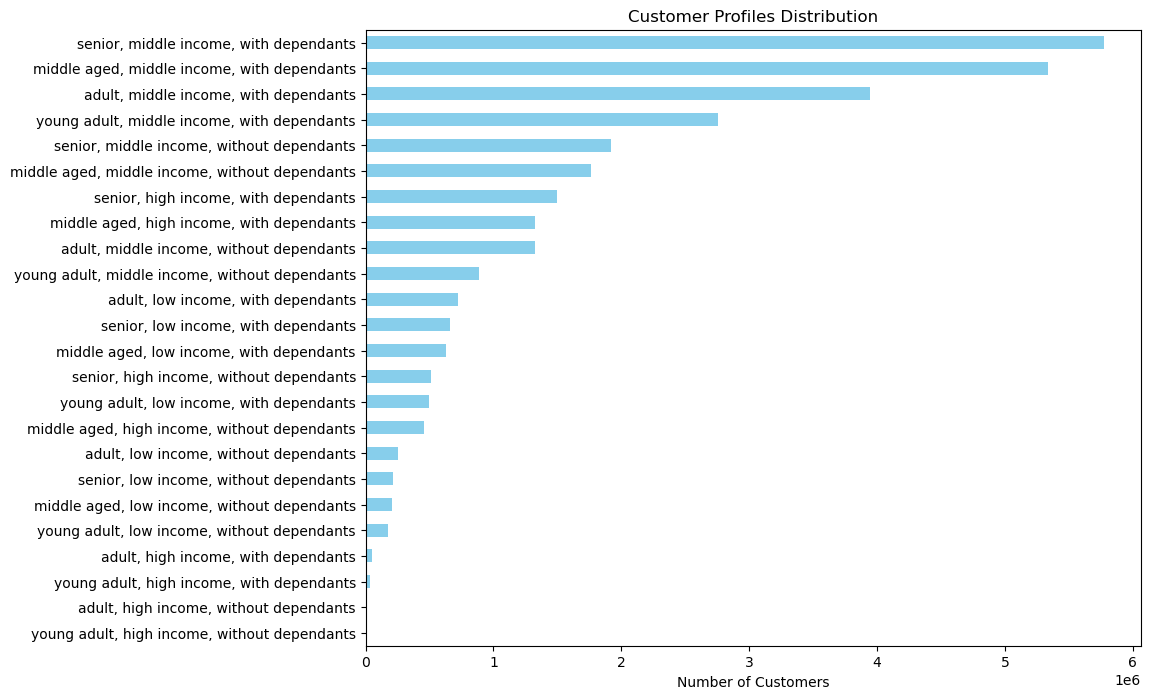

In [30]:
# Create a bar chart to visualize the distribution of the different customer profiles.

cust_pr = cust_pr_counts.plot.barh(color = 'skyblue', title = 'Customer Profiles Distribution', xlabel = 'Number of Customers')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 8)

### Customer groups that pay the most.

In [12]:
# Group by "customer_profile", then sum the prices

cust_pr_rev = ic_tidy.groupby('customer_profile')['prices'].sum().reset_index()

In [13]:
# Sort grouped data from highest to lowest

cust_pr_rev = cust_pr_rev.sort_values(by = 'prices', ascending = False)

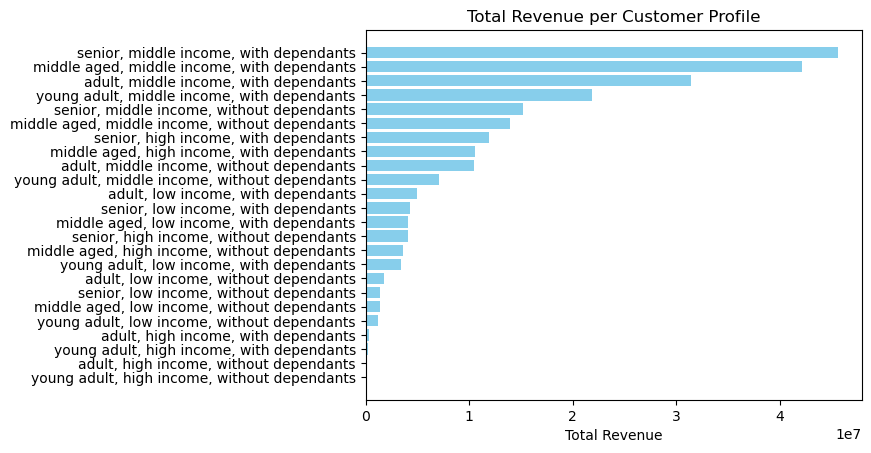

In [14]:
# Create a bar chart to visualize the revenue by different customer profiles

cust_pr_sales = plt.barh(cust_pr_rev['customer_profile'], cust_pr_rev['prices'], color = 'skyblue')
plt.title('Total Revenue per Customer Profile')
plt.xlabel('Total Revenue')
plt.gca().invert_yaxis()

### Differences in ordering habits based on a customer's loyalty status.

In [7]:
# Group by "orders_day_of_week" and "loyalty_flag"

grouped_loyal = ic_tidy.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack(fill_value = 0)

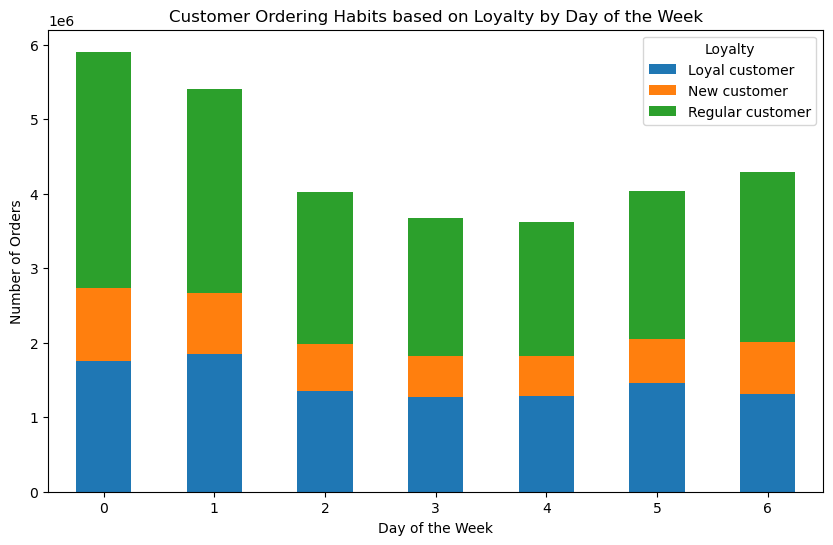

In [8]:
# Create a stacked bar chart of the ordering habits based on loyalty by day of the week

loyal_dow = grouped_loyal.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.title('Customer Ordering Habits based on Loyalty by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)
plt.legend(title = 'Loyalty')

### Connection between age and family status in terms of ordering habits

In [7]:
# Group by "orders_day_of_week" and "age_fam_flag"

grouped_fam = ic_tidy.groupby(['orders_day_of_week', 'age_fam_flag']).size().unstack(fill_value = 0)

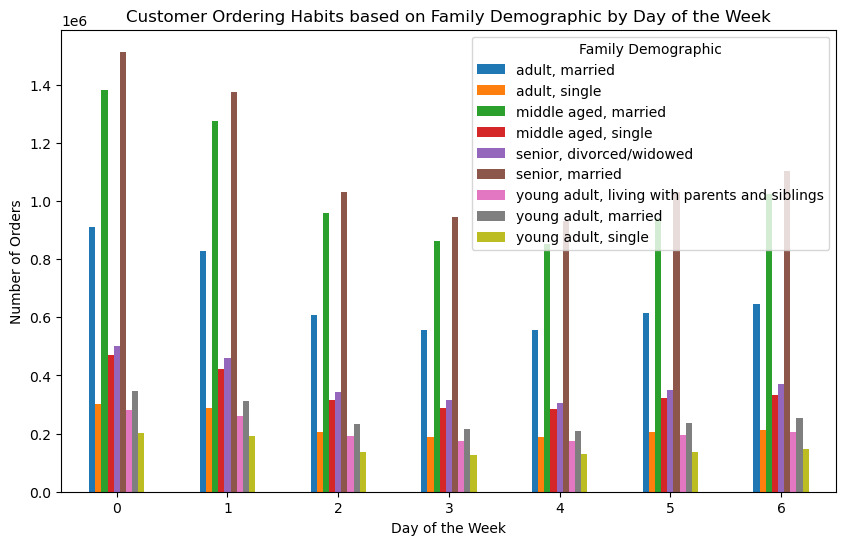

In [8]:
# Create a bar chart of the ordering habits based on family demographic by day of the week

age_fam = grouped_fam.plot(kind = 'bar', figsize = (10, 6))
plt.title('Customer Ordering Habits based on Family Demographic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)
plt.legend(title = 'Family Demographic')

### Spending behaviour of the different family demographics

In [9]:
# Group by "age_fam_flag" and "spending_flag"

grouped_fam_spender = ic_tidy.groupby(['age_fam_flag', 'spending_flag']).size().unstack(fill_value = 0)

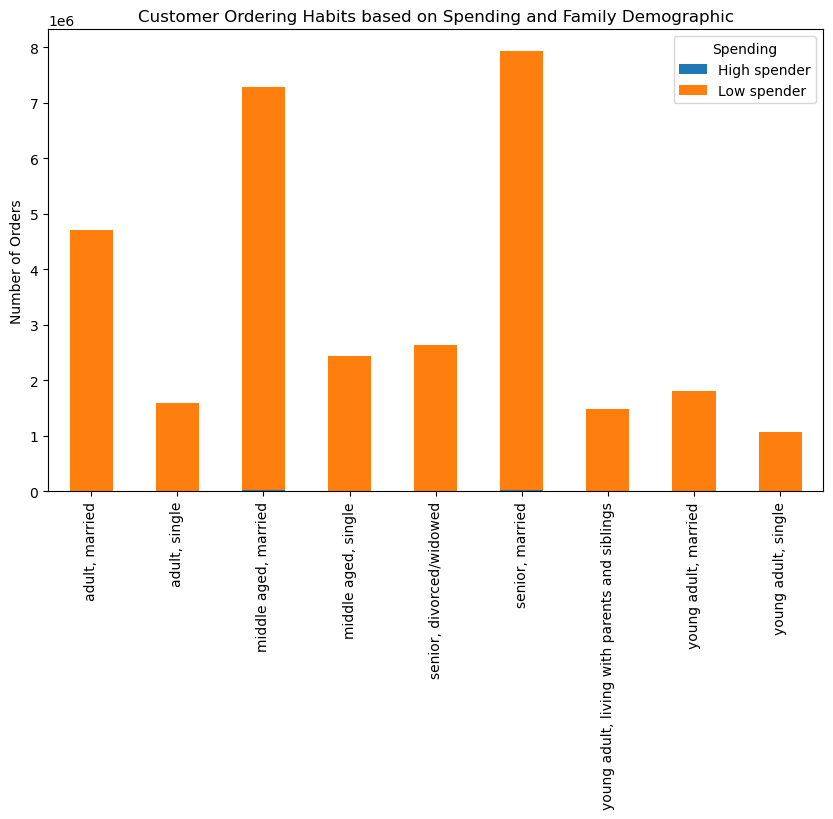

In [10]:
# Create a stacked bar chart of the ordering habits based on spending and family demographic

fam_spend = grouped_fam_spender.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.title('Customer Ordering Habits based on Spending and Family Demographic')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.legend(title = 'Spending')

### Frequency of ordering behaviour of the different family demographics

In [11]:
# Group by "age_fam_flag" and "frequency_flag"

grouped_freq = ic_tidy.groupby(['age_fam_flag', 'frequency_flag']).size().unstack(fill_value = 0)

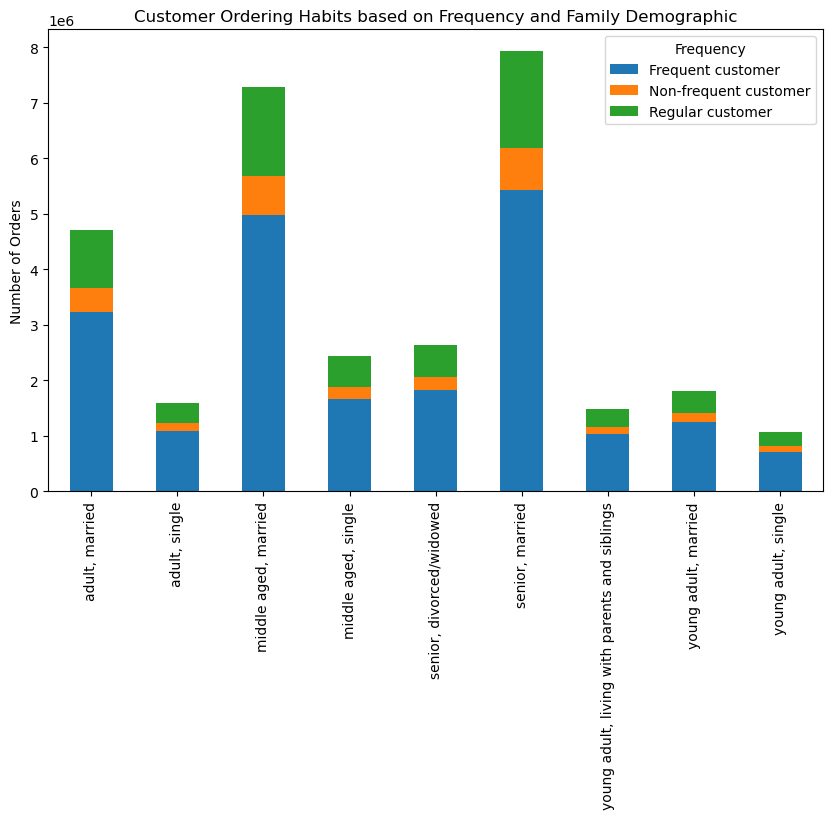

In [12]:
# Create a stacked bar chart of the ordering habits based on frequency and family demographics

fam_freq = grouped_freq.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.title('Customer Ordering Habits based on Frequency and Family Demographic')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.legend(title = 'Frequency')

### The total revenue for different family demographics

In [23]:
# Group by "age_fam_flag" then sum the "prices"

grouped_fam_rev = ic_tidy.groupby('age_fam_flag')['prices'].sum()

Text(0, 0.5, 'Revenue')

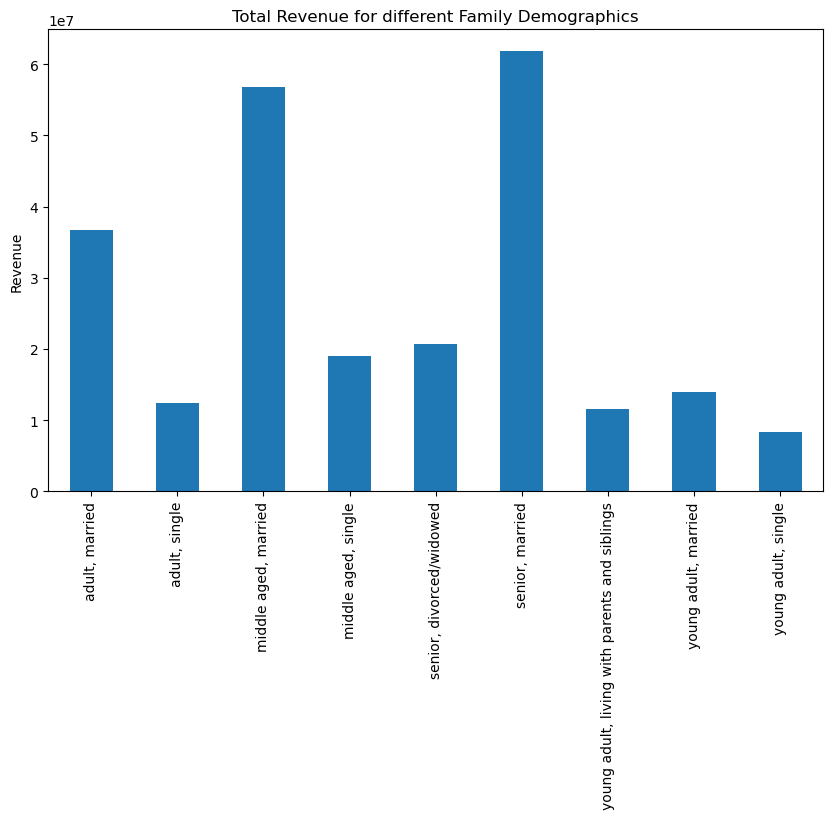

In [24]:
# Create a bar chart of the total revenue for different family demographics

avg_fam_rev = grouped_fam_rev.plot(kind = 'bar', figsize = (10, 6))
plt.title('Total Revenue for different Family Demographics')
plt.xlabel('')
plt.ylabel('Revenue')

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [25]:
# Aggregate the min, mean and max variables on a customer-profile level for "prices"

ic_tidy.groupby('age_fam_flag')['prices'].agg(['min', 'mean', 'max'])

,min,mean,max
age_fam_flag,,,
"adult, married",1.0,7.785878,25.0
"adult, single",1.0,7.783245,25.0
"middle aged, married",1.0,7.792658,25.0
"middle aged, single",1.0,7.788593,25.0
"senior, divorced/widowed",1.0,7.801014,25.0
"senior, married",1.0,7.793589,25.0
"young adult, living with parents and siblings",1.0,7.800604,25.0
"young adult, married",1.0,7.777622,25.0
"young adult, single",1.0,7.772748,25.0


In [26]:
# Aggregate the min, mean and max variables on a customer-profile level for "days_since_prior_order"

ic_tidy.groupby('age_fam_flag')['days_since_prior_order'].agg(['min', 'mean', 'max'])

,min,mean,max
age_fam_flag,,,
"adult, married",0.0,10.810900,30.0
"adult, single",0.0,10.812075,30.0
"middle aged, married",0.0,10.851995,30.0
"middle aged, single",0.0,10.723006,30.0
"senior, divorced/widowed",0.0,10.750328,30.0
"senior, married",0.0,10.817469,30.0
"young adult, living with parents and siblings",0.0,10.750995,30.0
"young adult, married",0.0,10.736201,30.0
"young adult, single",0.0,11.022312,30.0


### Compare your customer profiles with regions and departments.

##### regions

In [12]:
# Group by "region" and "age_fam_flag"

grouped_region = ic_tidy.groupby(['region', 'age_fam_flag']).size().unstack(fill_value = 0)

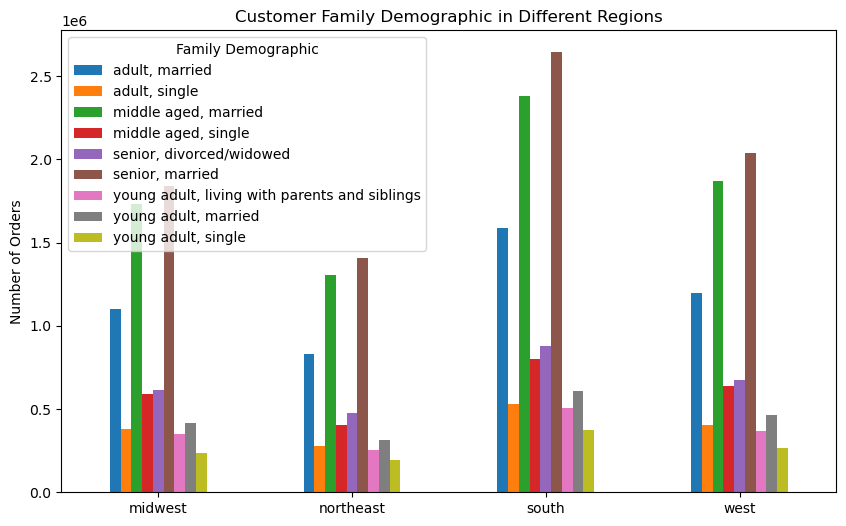

In [13]:
# Create a bar chart of customer family demographic in different regions

fam_region = grouped_region.plot(kind = 'bar', figsize = (10, 6))
plt.title('Customer Family Demographic in Different Regions')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)
plt.legend(title = 'Family Demographic')

In [5]:
# Group by "region" and "frequency_flag"

grouped_region_freq = ic_tidy.groupby(['region', 'frequency_flag']).size().unstack(fill_value = 0)

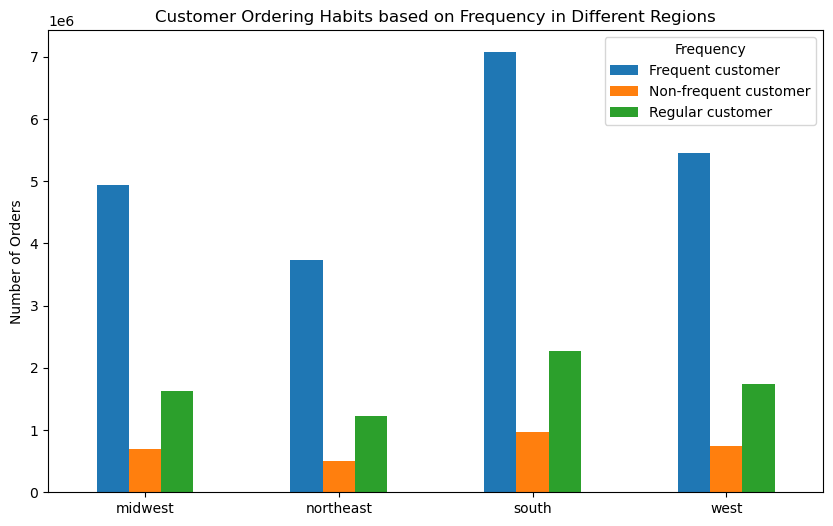

In [9]:
# Create a bar chart

freq_region = grouped_region_freq.plot(kind = 'bar', figsize = (10, 6))
plt.title('Customer Ordering Habits based on Frequency in Different Regions')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)
plt.legend(title = 'Frequency')

##### departments

In [9]:
# Group by "department_id" and "age_fam_flag" then sum the "prices"

grouped_age_dep = ic_tidy.groupby(['department_id', 'age_fam_flag'])['prices'].sum().unstack()

In [10]:
# Finde the top 5 departments with the highest revenues

top_5 = grouped_age_dep.sum(axis = 1).nlargest(5).index

In [11]:
# Create a dataframe with only the departments with the top 5 highest revenues

top_5_data = grouped_age_dep.loc[top_5]

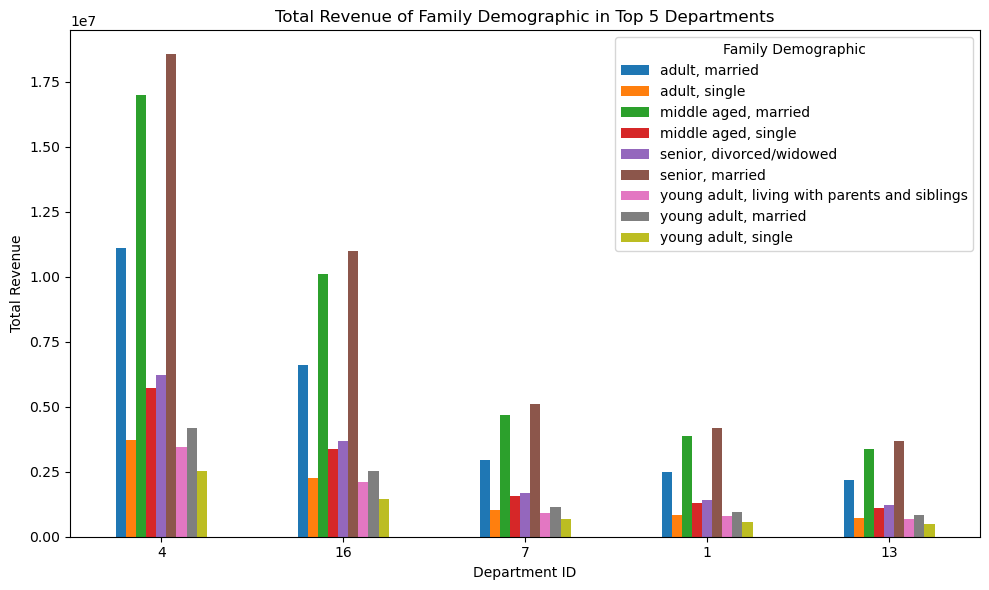

In [12]:
# Create a bar chart

dep_age = top_5_data.plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Department ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue of Family Demographic in Top 5 Departments')
plt.legend(title = 'Family Demographic')
plt.xticks(rotation = 0)
plt.tight_layout()

# 05 Export Data

In [15]:
# Export "ic_tidy"

ic_tidy.to_pickle(os.path.join(path, 'ic_tidy_done.pkl'))

# 06 Export Images

In [11]:
# Set new path

new_path = r'C:\Users\Tina\Desktop\CareerFoundry\Data Analytics Immersion\Instacart Basket Analysis'

In [31]:
# Export "cust_pr" (Customer Profiles Distribution)

cust_pr.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'customer_profiles_distribution.png'))

In [29]:
# Export "cust_pr_sales" (Total Revenue per Customer Profile)

cust_pr_sales.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'customer_profiles_sales.png'))

AttributeError: 'BarContainer' object has no attribute 'savefig'

In [12]:
# Export "loyal_dow" (Customer Ordering Habits based on Loyalty by Day of the Week)

loyal_dow.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'loyalty_by_day_of_week.png'))

In [15]:
# Export "age_fam" (Customer Ordering Habits based on Age and Family Status by Day of the Week)

age_fam.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'age_fam_dow.png'))

In [18]:
# Export "fam_spend" (Customer Ordering Habits based on Spending and Family Demographic)

fam_spend.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'spending_family.png'))

In [ ]:
# Export "fam_freq" (Customer Ordering Habits based on Frequency and Family Demographic)

fam_freq.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'frequency_family.png'))

In [ ]:
# Export "avg_fam_rev" (Total Revenue for different Family Demographic)

avg_fam_rev.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'average_family_revenue.png'))

In [ ]:
# Export "fam_region" (Customer Family Demographic in different Regions)

fam_region.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'family_region.png'))

In [ ]:
# Export "dep_age" (Total Revenue of Family Demographic in Top 5 Departments)

dep_age.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'family_department.png'))

In [ ]:
# Export "freq_region" (Customer Family Demographic in Different Regions)

freq_region.figure.savefig(os.path.join(new_path, '04 Analysis', 'Visualizations', 'frequency_region.png'))